TF-IDF using tfidfVectorizer

Using https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html#visualize-tf-idf

https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html

In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pathlib import Path  
import glob

In [254]:
# df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Analysis/Descriptive-Stats/left_congress.csv', encoding='latin-1')
# df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Analysis/Descriptive-Stats/right_congress.csv', encoding='latin-1')
df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Analysis/Descriptive-Stats/left_date.csv', encoding='latin-1')
# df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Analysis/Descriptive-Stats/right_date.csv', encoding='latin-1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date2   111 non-null    object
 1   text    111 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [255]:
corpus = df['text'].apply(str) # all documents
documents = [" ".join(strings.split()) for strings in corpus] 

In [256]:
# congress_str = df['Congress'].apply(str) # all documents
# congress = [" ".join(strings.split()) for strings in congress_str]

date_str = df['date2'].apply(str) # all documents
date = [" ".join(strings.split()) for strings in date_str]


To calculate tf–idf scores for every word, we use scikit-learn’s TfidfVectorizer. When you initialize TfidfVectorizer, you can choose to set it with different parameters. These parameters will change the way you calculate tf–idf. The recommended way to run TfidfVectorizer is with smoothing (smooth_idf = True) and normalization (norm='l2') turned on. These parameters will better account for differences in text length, and overall produce more meaningful tf–idf scores. Smoothing and L2 normalization are actually the default settings for TfidfVectorizer, so to turn them on, you don’t need to include any extra code at all. Initialize TfidfVectorizer with desired parameters (default smoothing and normalization)

In [257]:
tfidf_vectorizer = TfidfVectorizer()

Make a DataFrame out of the resulting tf–idf vector, setting the “feature names” or words as columns and the titles as rows

In [258]:
tfidf_vector = tfidf_vectorizer.fit_transform(documents)

In [259]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=date, columns=tfidf_vectorizer.get_feature_names_out())
# select words of interest
tfidf_slice = tfidf_df[['trump','fraud','rights', 'black', 'turnout','suppression','court']] 
tfidf_slice.sort_index().round(decimals=2)

,trump,fraud,rights,black,turnout,suppression,court
01/2013,0.00,0.01,0.08,0.01,0.00,0.02,0.01
01/2014,0.00,0.02,0.17,0.05,0.01,0.01,0.10
01/2015,0.01,0.00,0.13,0.07,0.00,0.00,0.09
01/2016,0.04,0.05,0.22,0.01,0.01,0.00,0.12
01/2017,0.41,0.14,0.17,0.08,0.00,0.01,0.09
...,...,...,...,...,...,...,...
12/2017,0.11,0.03,0.09,0.25,0.07,0.02,0.05
12/2018,0.10,0.09,0.03,0.02,0.01,0.00,0.08
12/2019,0.22,0.02,0.04,0.16,0.02,0.03,0.05
12/2020,0.30,0.15,0.07,0.11,0.04,0.03,0.07


In [260]:
tfidf_slice['date'] = tfidf_slice.index
tfidf_slice.head()

C:\Users\analo\AppData\Local\Temp/ipykernel_23580/770426153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_slice['date'] = tfidf_slice.index


,trump,fraud,rights,black,turnout,suppression,court,date
01/2013,0.000000,0.014072,0.081468,0.006850,0.000000,0.022474,0.006789,01/2013
01/2014,0.001601,0.019867,0.166141,0.051579,0.014832,0.012692,0.095851,01/2014
01/2015,0.007551,0.000000,0.132592,0.069931,0.003179,0.000000,0.093417,01/2015
01/2016,0.040759,0.048699,0.224103,0.010941,0.011441,0.000000,0.115666,01/2016
01/2017,0.413450,0.141767,0.172046,0.078257,0.001488,0.012449,0.090254,01/2017


In [261]:
from datetime import datetime as dt
tfidf_slice['date']= pd.to_datetime(tfidf_slice['date'])
tfidf_slice = tfidf_slice.sort_values(by="date")
tfidf_slice['date'] = tfidf_slice['date'].dt.strftime('%Y-%m')
tfidf_slice.head()

C:\Users\analo\AppData\Local\Temp/ipykernel_23580/3455146491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_slice['date']= pd.to_datetime(tfidf_slice['date'])


,trump,fraud,rights,black,turnout,suppression,court,date
01/2013,0.0,0.014072,0.081468,0.006850,0.000000,0.022474,0.006789,2013-01
02/2013,0.0,0.024408,0.225417,0.054314,0.049696,0.007425,0.104298,2013-02
03/2013,0.0,0.034758,0.294105,0.072884,0.029942,0.014234,0.131573,2013-03
04/2013,0.0,0.005452,0.078906,0.137997,0.027751,0.000000,0.110469,2013-04
05/2013,0.0,0.005297,0.081775,0.154704,0.097064,0.016919,0.040888,2013-05


Text(0, 0.5, 'tf-idf')

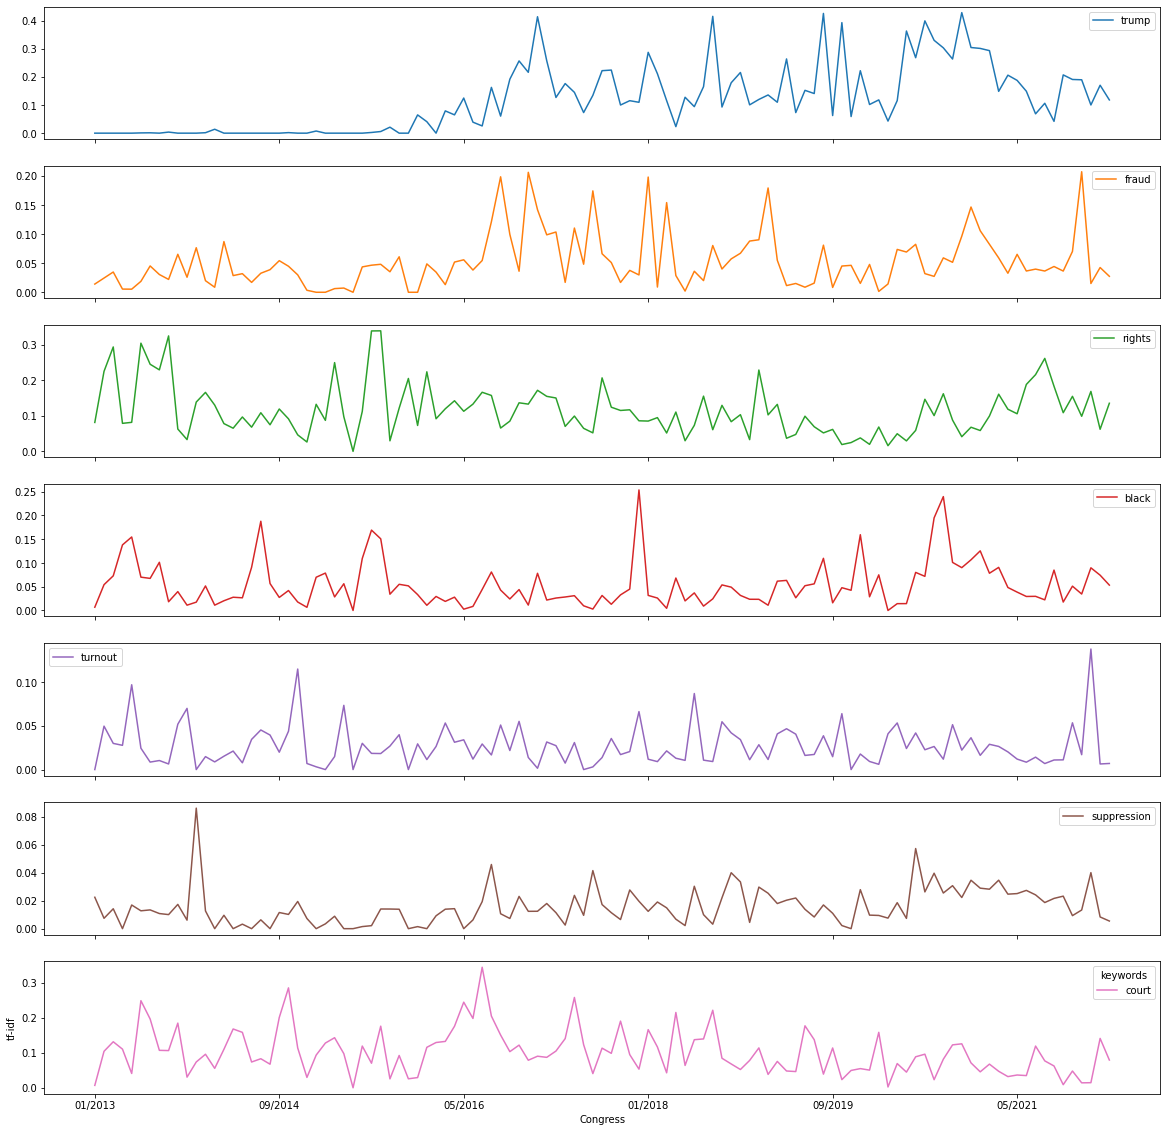

In [262]:
import matplotlib.pyplot as plt
tfidf_slice.plot(subplots=True, figsize=(20, 20)); plt.legend(loc='best', title = "keywords"); plt.xlabel("Congress"); plt.ylabel("tf-idf")
#tfidf_slice.plot(figsize=(35, 10)); plt.legend(loc='best', title = "keywords"); plt.xlabel("Congress"); plt.ylabel("tf-idf")